In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning

In [2]:
df = pd.read_csv('../Datasets/games-features.csv')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['GenreIsNonGame'] == False]
# CONSIDER DROPPING GAMES THAT HAVEN'T BEEN OWNED
# df = df.loc[df['SteamSpyOwners'] > 0]
df = df.drop(columns=['QueryID', 'ResponseID', 'QueryName', 'PackageCount',
                      'AchievementHighlightedCount', 'AchievementCount', 'ControllerSupport', 'PCReqsHaveMin',
                      'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
                      'MacReqsHaveRec', 'SupportEmail', 'SupportURL', 'ExtUserAcctNotice',
                      'HeaderImage', 'LegalNotice', 'Website', 'PCMinReqsText',
                      'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText'])
print(df.shape)
df.head()

(12562, 53)


,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceCurrency,PriceInitial,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages
0,Counter-Strike,2000-11-01,0,0,1,0,88,0,68991,1,...,USD,9.99,9.99,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...
1,Team Fortress Classic,1999-04-01,0,0,1,0,0,0,2439,1,...,USD,4.99,4.99,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,English French German Italian Spanish
2,Day of Defeat,2003-05-01,0,0,1,0,79,0,2319,1,...,USD,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish
3,Deathmatch Classic,2001-06-01,0,0,1,0,0,0,888,1,...,USD,4.99,4.99,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish
4,Half-Life: Opposing Force,1999-11-01,0,0,1,0,0,0,2934,1,...,USD,4.99,4.99,Return to the Black Mesa Research Facility as ...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,English French German Korean


## Analysis

In [3]:
popularity = ['ResponseName', 'SteamSpyOwners']
varaibles =  ['ReleaseDate', 'Metacritic', 'RecommendationCount', 'IsFree', 'FreeVerAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 
       'PriceFinal']
sentiment_analysis = ['ShortDescrip', 'AboutText', 'Reviews']
advertising = ['MovieCount', 'ScreenshotCount']


Pauline = ['ReleaseDate', 'Metacritic', 'SteamSpyOwners', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer']
Nathan = ['RecommendationCount', 'IsFree', 'FreeVerAvail', 'SteamSpyOwners']
Duy = [ 'PlatformWindows', 'PlatformLinux', 'PlatformMac','SteamSpyOwners']
Mel = ['MovieCount', 'ScreenshotCount', 'PriceFinal', 'SteamSpyOwners']
Nicole = ['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'SteamSpyOwners']

### SteamSpyOwners

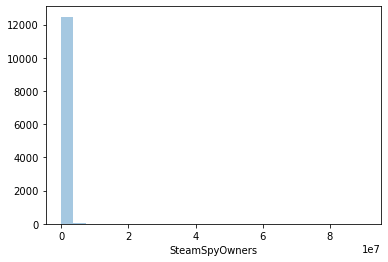

In [4]:
df.loc[:, 'SteamSpyOwnersLog'] = df['SteamSpyOwners'].apply(lambda x: 0 if x == 0 else np.log(x))
sns.distplot(df['SteamSpyOwners'], bins=25, kde=False)

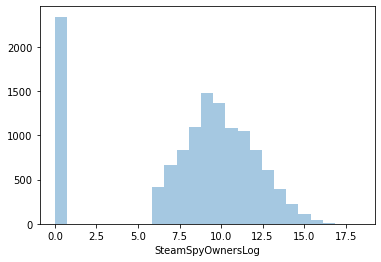

In [5]:
sns.distplot(df['SteamSpyOwnersLog'], bins=25, kde=False)

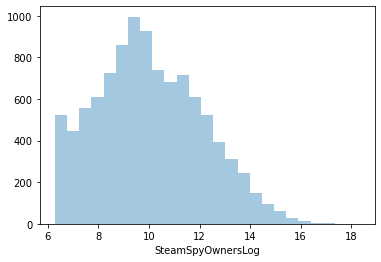

In [6]:
sns.distplot(df[df['SteamSpyOwners'] > 0]['SteamSpyOwnersLog'], bins=25, kde=False)

### ReleaseDate
try to aggregate by mean, median, make barh plots, split into seasons

In [7]:
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseQuarter'] = ((df['ReleaseDate'].dt.month - 1) / 3).astype(int) + 1
df['ReleaseYearMonth'] = df['ReleaseDate'].apply(lambda dt: dt.replace(day=1))
df['ReleaseYearQuarter'] = df['ReleaseDate'].apply(lambda dt: dt.replace(month = int((dt.month - 1) / 3) * 3 + 1, day=1))
df.head()

,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages,SteamSpyOwnersLog,ReleaseMonth,ReleaseYear,ReleaseQuarter,ReleaseYearMonth,ReleaseYearQuarter
0,Counter-Strike,2000-11-01,0,0,1,0,88,0,68991,1,...,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...,16.383021,11,2000,4,2000-11-01,2000-10-01
1,Team Fortress Classic,1999-04-01,0,0,1,0,0,0,2439,1,...,One of the most popular online action games of...,,,English French German Italian Spanish,15.501750,4,1999,2,1999-04-01,1999-04-01
2,Day of Defeat,2003-05-01,0,0,1,0,79,0,2319,1,...,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish,15.846432,5,2003,2,2003-05-01,2003-04-01
3,Deathmatch Classic,2001-06-01,0,0,1,0,0,0,888,1,...,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish,15.830276,6,2001,2,2001-06-01,2001-04-01
4,Half-Life: Opposing Force,1999-11-01,0,0,1,0,0,0,2934,1,...,Return to the Black Mesa Research Facility as ...,,,English French German Korean,15.501817,11,1999,4,1999-11-01,1999-10-01


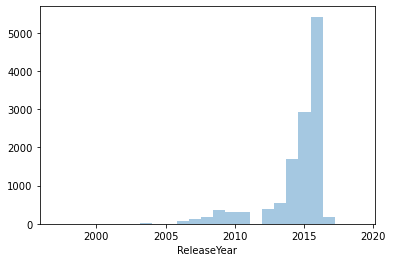

In [8]:
sns.distplot(df['ReleaseYear'], bins=25, kde=False)

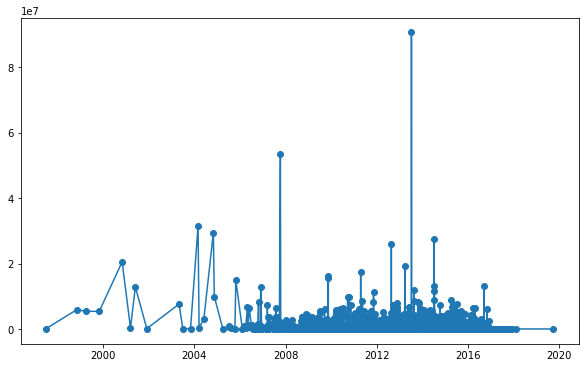

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseDate').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseDate').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseDate').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseDate').agg({'SteamSpyOwners': 'sum'}).values))

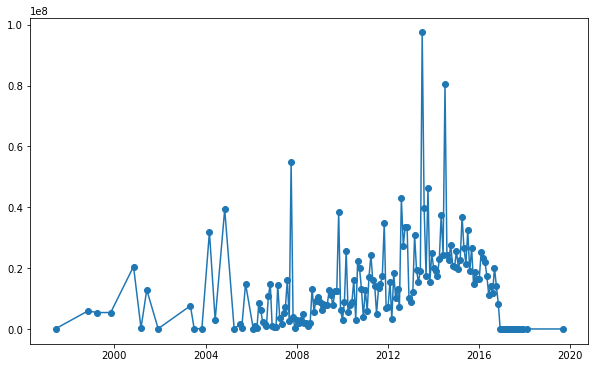

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseYearMonth').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYearMonth').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseYearMonth').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYearMonth').agg({'SteamSpyOwners': 'sum'}).values))

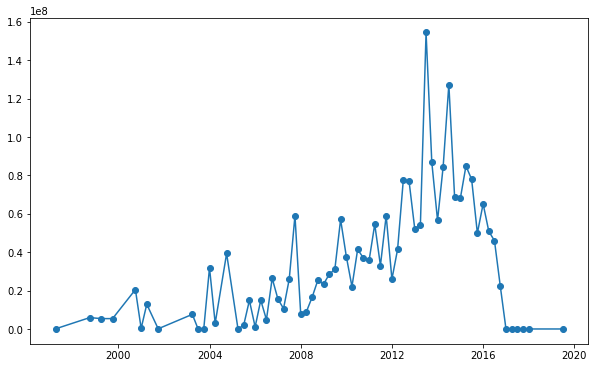

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseYearQuarter').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYearQuarter').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseYearQuarter').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYearQuarter').agg({'SteamSpyOwners': 'sum'}).values))

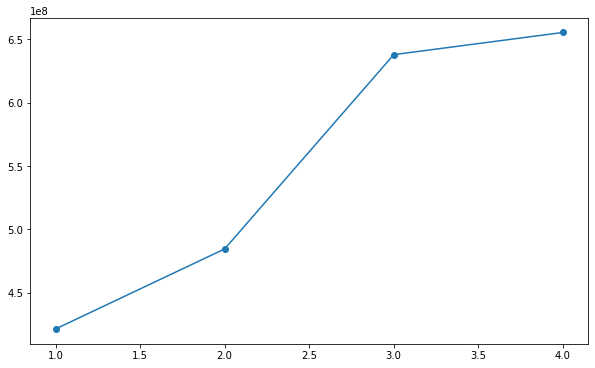

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).values))

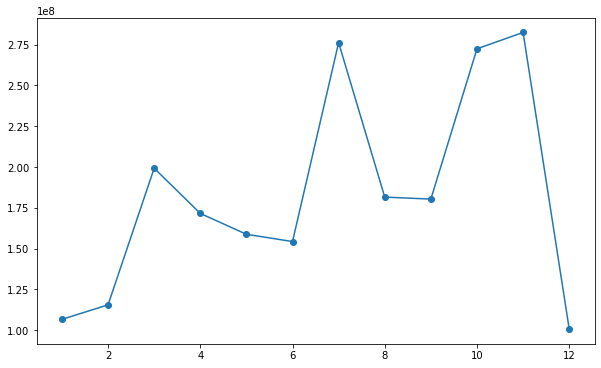

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseMonth').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseMonth').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseMonth').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseMonth').agg({'SteamSpyOwners': 'sum'}).values))

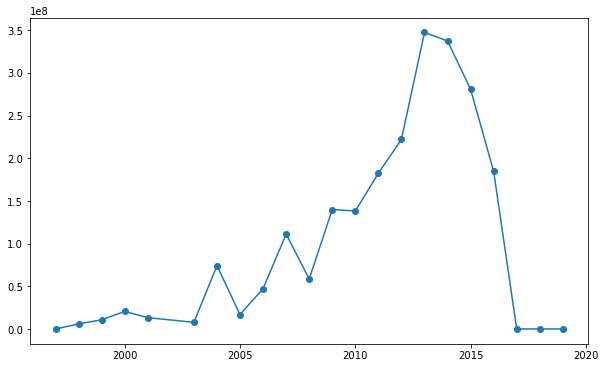

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).values))  

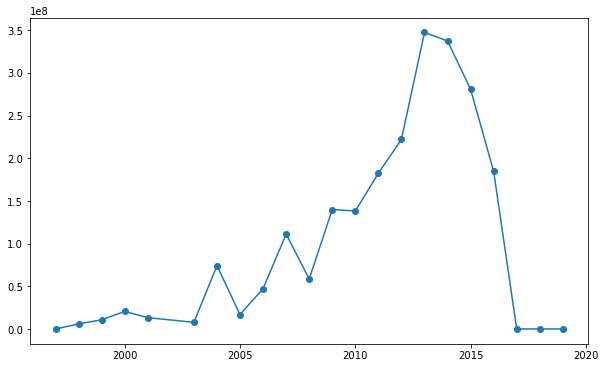

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).index),
                (df.groupby('ReleaseYear').agg({'SteamSpyOwners': 'sum'}).values)) 

### Metacritic
1. exponential relationship, need to explore
2. agg by sum, mean, median, make different plots

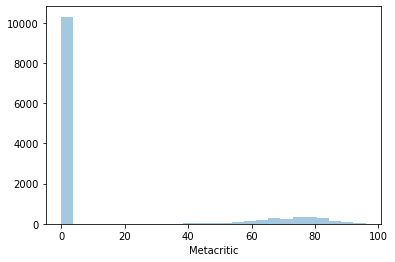

In [16]:
sns.distplot(df['Metacritic'], bins=25, kde=False)

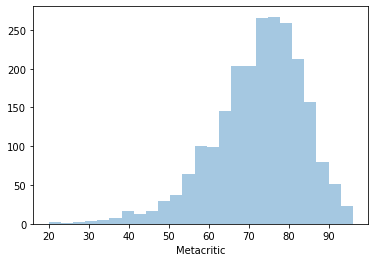

In [17]:
sns.distplot(df.loc[df['Metacritic'] > 0,'Metacritic'], bins=25, kde=False)

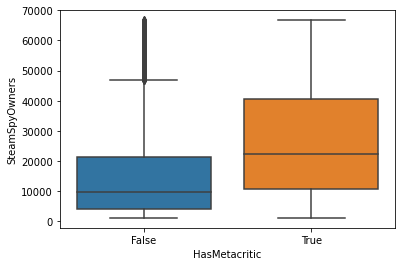

In [18]:
df['HasMetacritic'] = df['Metacritic'] > 0
lower, upper = df['SteamSpyOwners'].quantile([0.25, 0.75])
sns.boxplot(x="HasMetacritic", y="SteamSpyOwners", data=df.loc[(df['SteamSpyOwners'] >= lower) &
                                                               (df['SteamSpyOwners'] <= upper)])


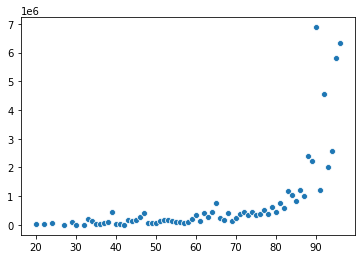

In [19]:
dfWithMetacritic = df[df['HasMetacritic']]

sns.scatterplot(list(dfWithMetacritic.groupby('Metacritic').agg({'SteamSpyOwners': 'mean'}).index), 
               list(dfWithMetacritic.groupby('Metacritic').agg({'SteamSpyOwners': 'mean'}).values))

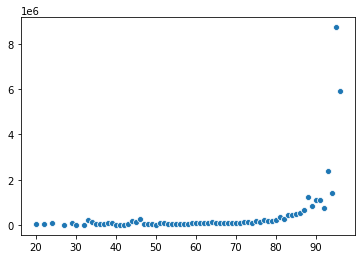

In [20]:
sns.scatterplot(list(dfWithMetacritic.groupby('Metacritic').agg({'SteamSpyOwners': 'median'}).index), 
               list(dfWithMetacritic.groupby('Metacritic').agg({'SteamSpyOwners': 'median'}).values))

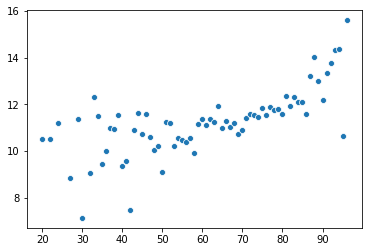

In [21]:
sns.scatterplot(list(dfWithMetacritic.groupby('Metacritic').agg({'SteamSpyOwnersLog': 'mean'}).index), 
               list(dfWithMetacritic.groupby('Metacritic').agg({'SteamSpyOwnersLog': 'mean'}).values))

### RecommendationCount

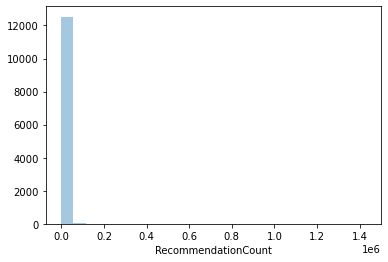

In [22]:
sns.distplot(df['RecommendationCount'], bins = 25, kde=False)

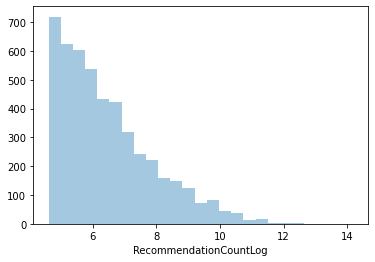

In [23]:
df.loc[:,'RecommendationCountLog'] = np.log(df.loc[df['RecommendationCount'] > 0, 'RecommendationCount'])
sns.distplot(df['RecommendationCountLog'], bins = 25, kde=False)

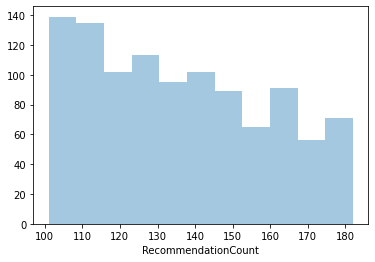

In [24]:
lower, upper = df['RecommendationCount'].quantile([0.3, 0.7])
recommendedClipped = df[(df['RecommendationCount'] > lower) & (df['RecommendationCount'] <= upper)]
sns.distplot(recommendedClipped['RecommendationCount'], kde=False)

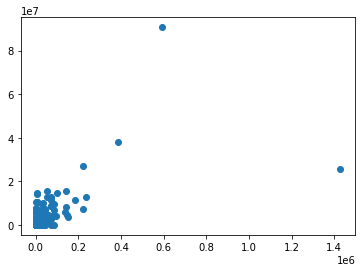

In [25]:
plt.scatter(x = 'RecommendationCount', y = 'SteamSpyOwners', data = df)

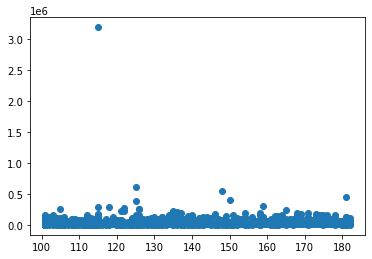

In [26]:
plt.scatter(x = 'RecommendationCount', y = 'SteamSpyOwners', data = recommendedClipped)

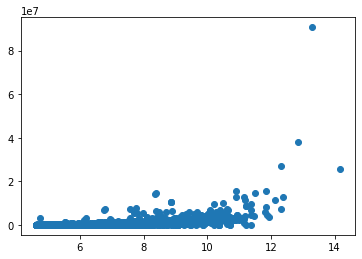

In [27]:
plt.scatter(x = 'RecommendationCountLog', y = 'SteamSpyOwners', data = df)

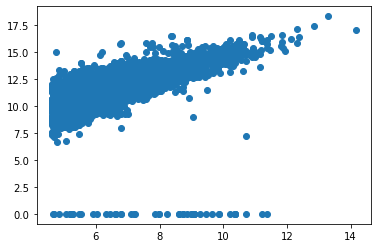

In [28]:
plt.scatter(x = 'RecommendationCountLog', y = 'SteamSpyOwnersLog', data = df)

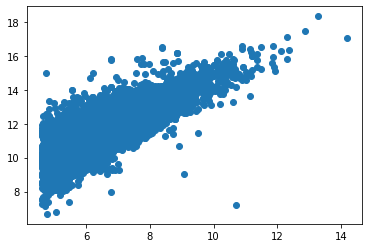

In [29]:
plt.scatter(x = 'RecommendationCountLog', y = 'SteamSpyOwnersLog', data = df[df['SteamSpyOwners'] > 0])

### IsFree

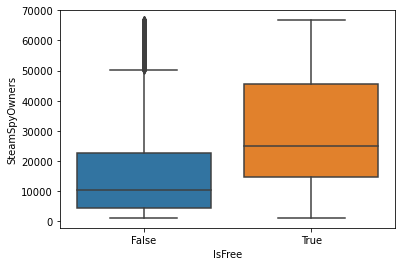

In [30]:
lower, upper = df['SteamSpyOwners'].quantile([0.25, 0.75])
sns.boxplot(x="IsFree", y="SteamSpyOwners", data=df[(df['SteamSpyOwners'] >= lower) & (df['SteamSpyOwners'] <= upper)])

### FreeVerAvail

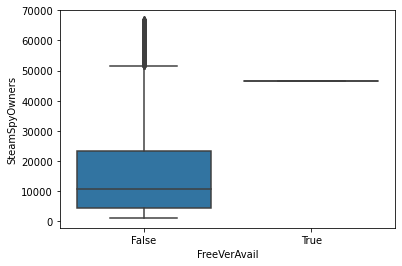

In [31]:
lower, upper = df['SteamSpyOwners'].quantile([0.25, 0.75])
sns.boxplot(x="FreeVerAvail", y="SteamSpyOwners", data=df[(df['SteamSpyOwners'] >= lower) & (df['SteamSpyOwners'] <= upper)])